# Convolutional Neural Network Architecture
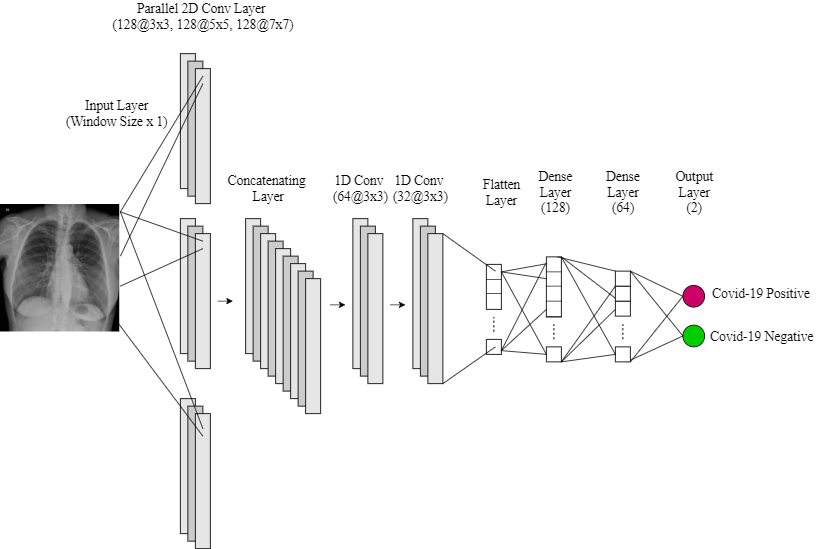

In [14]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [20]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 15s 283ms/step - loss: 0.4749 - accuracy: 0.7288 - val_loss: 0.1089 - val_accuracy: 0.9548
Epoch 2/20
50/50 [==============================] - 14s 272ms/step - loss: 0.1021 - accuracy: 0.9609 - val_loss: 0.0875 - val_accuracy: 0.9718
Epoch 3/20
50/50 [==============================] - 13s 269ms/step - loss: 0.0775 - accuracy: 0.9731 - val_loss: 0.1718 - val_accuracy: 0.9379
Epoch 4/20
50/50 [==============================] - 14s 273ms/step - loss: 0.0714 - accuracy: 0.9681 - val_loss: 0.0624 - val_accuracy: 0.9718
Epoch 5/20
50/50 [==============================] - 13s 271ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.1124 - val_accuracy: 0.9718
Epoch 6/20
50/50 [==============================] - 14s 275ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.2877 - val_accuracy: 0.9548
Epoch 7/20
50/50 [==============================] - 13s 269ms/step - loss: 0.0573 - accuracy: 0.9853 - val_loss: 0.0924 - val_accuracy: 0.9718

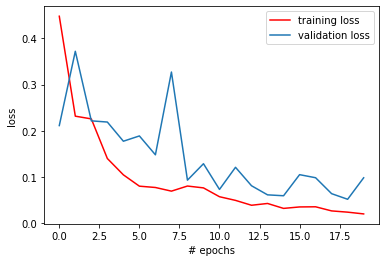

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

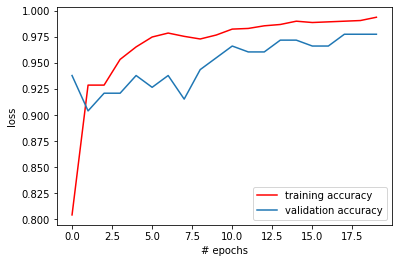

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 5s 746ms/step - loss: 0.0319 - accuracy: 0.9898
[0.03191700205206871, 0.9897959232330322]
